# Simulate an OU process

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Simulation Parameters

In [36]:
dt = 0.01             # Integration Time-step
T = 20.0              # Final time (seconds)
N = int(T/dt)              # Total number of data points

Ornstein–Uhlenbeck Variables

In [37]:
mu = 1.0                           # Mean
sigma = 0.01                      # Variance of process
theta = 0.5 * (1/dt)               # Time constant for mean-reversal:value between 0 and 1/dt
sigma = np.sqrt(sigma * 2 * theta) # Stationary long-term variance of OU process

Allocate memory for arrays

In [38]:
x = np.zeros((N,1))
dW = np.random.randn(N,1) * np.sqrt(dt)
t = np.arange(0,T,dt)

In [39]:
for i in range(1,N):
    x[i] = x[i-1] + theta *(mu - x[i-1]) * dt + sigma * dW[i-1]

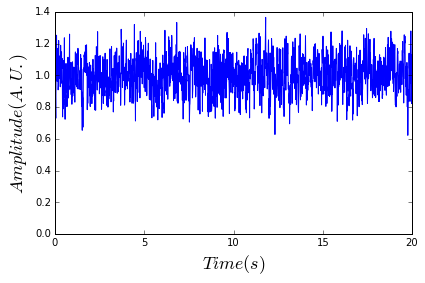

In [40]:
fig, ax = plt.subplots()
ax.plot(t,x, lw=1.0, color="blue", label=r"$x(t)$")
ax.set_xlabel("$Time (s)$", fontsize=18)
ax.set_ylabel("$Amplitude (A.U.)$", fontsize=18)
fig.tight_layout();

fig.savefig("OUprocess.pdf", dpi=300)

In [41]:
from bokeh.plotting import figure, output_file, show

In [44]:
#output to static HTML file
output_file("OUprocess.html", title="OU process example")
# create a new plot 
p = figure(tools="pan,box_zoom,reset,save", x_range=(0,N), y_range=(0,N))
p.line(t, x, color='navy')

# NEW: customize by setting attributes
p.title = "OU process"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Amplitude'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

RuntimeError: Columns need to be 1D (y is not)